## Cleaning Data

In [5]:
# Step 1: Imports
import pandas as pd
import numpy as np

In [7]:
# Step 2: First read attempt (comma-delimited)
INPUT_PATH = "C:/OneDrive/Bureau/Mes project Data Analyst/Global_freelance_Project/global_freelancers_raw.csv"

df_try = pd.read_csv(INPUT_PATH)
df_try.head()


,freelancer_ID;name;gender;age;country;language;primary_skill;years_of_experience;hourly_rate (USD);rating;is_active;client_satisfaction
0,FL250001;Ms. Nicole Kidd;f;52.0;Italy;Italian;...
1,FL250002;Vanessa Garcia;FEMALE;52.0;Australia;...
2,FL250003;Juan Nelson;male;53.0;Germany;German;...
3,FL250004;Amanda Spencer;F;38.0;Australia;Engli...
4,FL250005;Lynn Curtis DDS;female;53.0;Germany;G...


In [9]:
# Step 3: Read with semicolon if needed
if df_try.shape[1] == 1:
    df = pd.read_csv(INPUT_PATH, sep=";")
else:
    df = df_try.copy()

df.head()


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [11]:
# Step 4: Inspect shape and column names
print("Shape:", df.shape)
print("Columns:", list(df.columns))


Shape: (1000, 12)
Columns: ['freelancer_ID', 'name', 'gender', 'age', 'country', 'language', 'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating', 'is_active', 'client_satisfaction']


In [13]:
# Step 5: Clean column names (simple version)
def clean_col(col):
    return (
        str(col).strip()
        .replace("\n", " ")
        .replace("\t", " ")
        .lower()
        .replace(" ", "_")
        .replace("__", "_")
        .strip("_")
    )

df.columns = [clean_col(c) for c in df.columns]
list(df.columns)[:10]


['freelancer_id',
 'name',
 'gender',
 'age',
 'country',
 'language',
 'primary_skill',
 'years_of_experience',
 'hourly_rate_(usd)',
 'rating']

In [15]:
# Step 6: Quick preview
df.head(5)


,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate_(usd),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [17]:
# Step 7: Normalize empty markers & strip spaces
na_like = {"", "na", "n/a", "none", "null", "-", "--", "not available", "?"}

for c in df.columns:
    if df[c].dtype == object:
        df[c] = df[c].astype(str).str.strip()                    # remove extra spaces
        mask = df[c].str.lower().isin(na_like)                   # detect empty-like values
        df.loc[mask, c] = np.nan
        df[c] = df[c].str.replace(r"\s+", " ", regex=True)       # collapse multiple spaces

df.head(5)


,freelancer_id,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate_(usd),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,nan
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [19]:
# Step 8: Rename common fields to a clean schema
rename_map = {}
for c in df.columns:
    if "freelancer" in c and "id" in c:
        rename_map[c] = "freelancer_id"
    elif c.startswith("name"):
        rename_map[c] = "name"
    elif "gender" in c:
        rename_map[c] = "gender"
    elif c == "age":
        rename_map[c] = "age"
    elif "country" in c:
        rename_map[c] = "country"
    elif "language" in c:
        rename_map[c] = "language"
    elif "experience" in c:
        rename_map[c] = "years_experience"
    elif "hourly_rate" in c or "hourlyrate" in c:
        rename_map[c] = "hourly_rate_usd"
    elif c == "rating":
        rename_map[c] = "rating"
    elif "is_active" in c or "active" in c:
        rename_map[c] = "is_active"
    elif "client_satisfaction" in c:
        rename_map[c] = "client_satisfaction_pct"
    elif any(k in c for k in ["web", "mobile", "graphic", "blockchain", "development", "design"]):
        rename_map[c] = "specialization"

df = df.rename(columns=rename_map)
list(df.columns)


['freelancer_id',
 'name',
 'gender',
 'age',
 'country',
 'language',
 'primary_skill',
 'years_experience',
 'hourly_rate_usd',
 'rating',
 'is_active',
 'client_satisfaction_pct']

In [21]:
# Step 9: Make numbers numeric
from pandas.api.types import is_numeric_dtype, is_string_dtype

def to_float(series):
    s = series.astype(str)
    s = s.str.replace(r"[,$€£%]", "", regex=True)    # remove currency and %
    s = s.str.replace(r"[A-Za-z ]", "", regex=True)  # remove words like 'USD'
    s = s.str.replace(r"(?<=\d)[,](?=\d{3}\b)", "", regex=True)  # remove thousand commas
    if s.str.contains(",").mean() > 0.3 and s.str.contains(r"\.").mean() < 0.1:
        s = s.str.replace(",", ".", regex=False)    # decimal comma -> dot
    return pd.to_numeric(s, errors="coerce")

for c in ["age", "years_experience", "hourly_rate_usd", "rating", "client_satisfaction_pct"]:
    if c in df.columns:
        df[c] = to_float(df[c])

df[["age","years_experience","hourly_rate_usd","rating","client_satisfaction_pct"]].head(5)


,age,years_experience,hourly_rate_usd,rating,client_satisfaction_pct
0,52.0,11.0,100.0,NaN,NaN
1,52.0,34.0,100.0,3.3,84.0
2,53.0,31.0,50.0,0.0,71.0
3,38.0,4.0,40.0,1.5,90.0
4,53.0,27.0,30.0,4.8,83.0


In [23]:
# Step 10: Normalize gender
if "gender" in df.columns:
    def norm_gender(x):
        if pd.isna(x): 
            return np.nan
        s = str(x).strip().lower()
        if s in {"f", "female", "woman", "feminine"}:
            return "Female"
        if s in {"m", "male", "man", "masculine"}:
            return "Male"
        return "Other"
    df["gender"] = df["gender"].apply(norm_gender)

# Normalize is_active
if "is_active" in df.columns:
    def norm_bool(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        if s in {"1", "y", "yes", "true", "t"}:
            return True
        if s in {"0", "n", "no", "false", "f"}:
            return False
        return np.nan
    df["is_active"] = df["is_active"].apply(norm_bool)

df[["gender", "is_active"]].head(5) if "gender" in df.columns and "is_active" in df.columns else df.head(3)


,gender,is_active
0,Female,False
1,Female,True
2,Male,False
3,Female,False
4,Female,False


In [25]:
# Step 11: Drop duplicates
before = len(df)
if "freelancer_id" in df.columns:
    df = df.drop_duplicates(subset=["freelancer_id"], keep="first")
else:
    df = df.drop_duplicates()
after = len(df)
print("Duplicates removed:", before - after)


Duplicates removed: 0


In [27]:
# Step 12: Impute missing values (safe defaults)
for c in df.columns:
    if is_numeric_dtype(df[c]):
        if df[c].isna().any():
            df[c] = df[c].fillna(df[c].median())
    else:
        if df[c].isna().any():
            mode_vals = df[c].mode(dropna=True)
            if not mode_vals.empty:
                df[c] = df[c].fillna(mode_vals.iloc[0])

df.isna().mean().sort_values(ascending=False).head(10)


C:\Users\WIN\AppData\Local\Temp\ipykernel_8544\2110375612.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c] = df[c].fillna(mode_vals.iloc[0])


freelancer_id       0.0
name                0.0
gender              0.0
age                 0.0
country             0.0
language            0.0
primary_skill       0.0
years_experience    0.0
hourly_rate_usd     0.0
rating              0.0
dtype: float64

In [29]:
# Step 13: Clamp ranges & winsorize
if "rating" in df.columns:
    df["rating"] = df["rating"].clip(lower=0, upper=5)

if "client_satisfaction_pct" in df.columns:
    df["client_satisfaction_pct"] = df["client_satisfaction_pct"].clip(lower=0, upper=100)

if "hourly_rate_usd" in df.columns:
    q1 = df["hourly_rate_usd"].quantile(0.25)
    q3 = df["hourly_rate_usd"].quantile(0.75)
    iqr = q3 - q1
    if pd.notna(iqr) and iqr > 0:
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        df["hourly_rate_usd"] = df["hourly_rate_usd"].clip(lower=low, upper=high)


In [31]:
# Step 14: Tidy text casing
for c in ["name", "country", "language", "specialization"]:
    if c in df.columns and df[c].dtype == object:
        df[c] = df[c].str.title().str.strip()

df.head(10)


,freelancer_id,name,gender,age,country,language,primary_skill,years_experience,hourly_rate_usd,rating,is_active,client_satisfaction_pct
0,FL250001,Ms. Nicole Kidd,Female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,2.6,False,79.0
1,FL250002,Vanessa Garcia,Female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,True,84.0
2,FL250003,Juan Nelson,Male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,False,71.0
3,FL250004,Amanda Spencer,Female,38.0,Australia,English,Web Development,4.0,40.0,1.5,False,90.0
4,FL250005,Lynn Curtis Dds,Female,53.0,Germany,German,Web Development,27.0,30.0,4.8,False,83.0
5,FL250006,Lisa Johnson,Female,59.0,Netherlands,Dutch,AI,14.0,30.0,2.4,False,79.0
6,FL250007,Eric Myers,Male,52.0,Indonesia,Indonesian,Data Analysis,10.0,75.0,3.1,False,94.0
7,FL250008,Ricky Graham,Male,43.0,Italy,Italian,Blockchain Development,14.0,40.0,4.6,False,94.0
8,FL250009,Sean Martin,Male,26.0,United States,English,Blockchain Development,4.0,40.0,4.0,True,76.0
9,FL250010,Matthew Lloyd,Male,52.0,Turkey,Turkish,AI,22.0,50.0,2.6,True,79.0


In [33]:
# Step 15: Save + simple data dictionary
OUTPUT_PATH = "global_freelancers_clean.csv"
df.to_csv(OUTPUT_PATH, index=False)

data_dictionary = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(df[c].dtype) for c in df.columns],
    "num_missing": [int(df[c].isna().sum()) for c in df.columns],
    "unique_values": [int(df[c].nunique(dropna=True)) for c in df.columns]
})

print("Saved cleaned file to:", OUTPUT_PATH)
data_dictionary


Saved cleaned file to: global_freelancers_clean.csv


,column,dtype,num_missing,unique_values
0,freelancer_id,object,0,1000
1,name,object,0,992
2,gender,object,0,2
3,age,float64,0,41
4,country,object,0,21
5,language,object,0,16
6,primary_skill,object,0,10
7,years_experience,float64,0,41
8,hourly_rate_usd,float64,0,6
9,rating,float64,0,42


In [35]:
# Step 16: Quick checks
print(df.describe())
if "country" in df.columns and "hourly_rate_usd" in df.columns:
    print(df.groupby("country")["hourly_rate_usd"].median().sort_values(ascending=False).head(10))


               age  years_experience  hourly_rate_usd       rating  \
count  1000.000000       1000.000000      1000.000000  1000.000000   
mean     40.524000         11.221000        51.290000     2.521400   
std      11.762218          9.444329        26.259769     1.466572   
min      20.000000          0.000000        20.000000     0.000000   
25%      31.000000          3.000000        30.000000     1.500000   
50%      41.000000          9.000000        40.000000     2.600000   
75%      51.000000         17.000000        75.000000     3.700000   
max      60.000000         41.000000       100.000000     5.000000   

       client_satisfaction_pct  
count              1000.000000  
mean                 79.222000  
std                  10.434059  
min                  60.000000  
25%                  71.000000  
50%                  79.000000  
75%                  87.000000  
max                 100.000000  
country
Argentina         50.0
Indonesia         50.0
United States     

In [37]:
df.head()

,freelancer_id,name,gender,age,country,language,primary_skill,years_experience,hourly_rate_usd,rating,is_active,client_satisfaction_pct
0,FL250001,Ms. Nicole Kidd,Female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,2.6,False,79.0
1,FL250002,Vanessa Garcia,Female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,True,84.0
2,FL250003,Juan Nelson,Male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,False,71.0
3,FL250004,Amanda Spencer,Female,38.0,Australia,English,Web Development,4.0,40.0,1.5,False,90.0
4,FL250005,Lynn Curtis Dds,Female,53.0,Germany,German,Web Development,27.0,30.0,4.8,False,83.0


## Partie 1 : Description:

In [39]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   freelancer_id            1000 non-null   object 
 1   name                     1000 non-null   object 
 2   gender                   1000 non-null   object 
 3   age                      1000 non-null   float64
 4   country                  1000 non-null   object 
 5   language                 1000 non-null   object 
 6   primary_skill            1000 non-null   object 
 7   years_experience         1000 non-null   float64
 8   hourly_rate_usd          1000 non-null   float64
 9   rating                   1000 non-null   float64
 10  is_active                1000 non-null   bool   
 11  client_satisfaction_pct  1000 non-null   float64
dtypes: bool(1), float64(5), object(6)
memory usage: 87.0+ KB


,freelancer_id,name,gender,age,country,language,primary_skill,years_experience,hourly_rate_usd,rating,is_active,client_satisfaction_pct
0,FL250001,Ms. Nicole Kidd,Female,52.0,Italy,Italian,Blockchain Development,11.0,100.0,2.6,False,79.0
1,FL250002,Vanessa Garcia,Female,52.0,Australia,English,Mobile Apps,34.0,100.0,3.3,True,84.0
2,FL250003,Juan Nelson,Male,53.0,Germany,German,Graphic Design,31.0,50.0,0.0,False,71.0
3,FL250004,Amanda Spencer,Female,38.0,Australia,English,Web Development,4.0,40.0,1.5,False,90.0
4,FL250005,Lynn Curtis Dds,Female,53.0,Germany,German,Web Development,27.0,30.0,4.8,False,83.0


In [41]:
df.describe()


,age,years_experience,hourly_rate_usd,rating,client_satisfaction_pct
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.524000,11.221000,51.290000,2.521400,79.222000
std,11.762218,9.444329,26.259769,1.466572,10.434059
min,20.000000,0.000000,20.000000,0.000000,60.000000
25%,31.000000,3.000000,30.000000,1.500000,71.000000
50%,41.000000,9.000000,40.000000,2.600000,79.000000
75%,51.000000,17.000000,75.000000,3.700000,87.000000
max,60.000000,41.000000,100.000000,5.000000,100.000000


In [43]:
df.shape

(1000, 12)

In [45]:
df.isna().sum()


freelancer_id              0
name                       0
gender                     0
age                        0
country                    0
language                   0
primary_skill              0
years_experience           0
hourly_rate_usd            0
rating                     0
is_active                  0
client_satisfaction_pct    0
dtype: int64

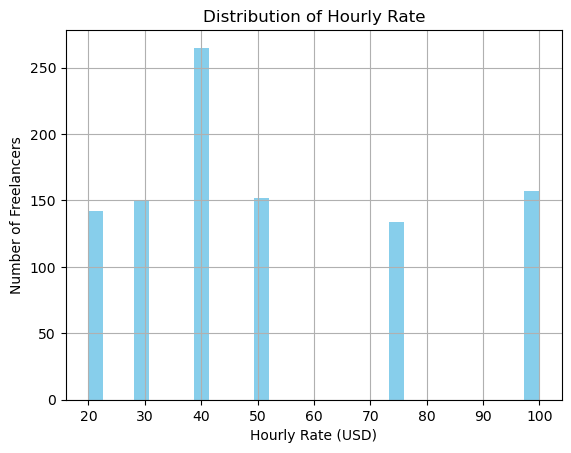

In [47]:
import matplotlib.pyplot as plt

df["hourly_rate_usd"].hist(bins=30, color='skyblue')
plt.title("Distribution of Hourly Rate")
plt.xlabel("Hourly Rate (USD)")
plt.ylabel("Number of Freelancers")
plt.show()


In [49]:
# For the description i see:
    # Most freelancers charge between $20 and $50 per hour.
    # $40/hour is the most common rate .
    # There are fewer freelancers charging high rates like $70 or $100/hour. 
    # Higher prices appear less frequently, suggesting only advanced or specialized freelancers charge them.

## Partie 2 : Professional / Business Insights

In [51]:
df["primary_skill"].value_counts().head(10)


primary_skill
DevOps                    112
UI/UX Design              109
Blockchain Development    105
Web Development           104
Mobile Apps               102
AI                        100
Data Analysis              96
Graphic Design             93
Machine Learning           93
Cybersecurity              86
Name: count, dtype: int64

In [53]:
df.groupby("primary_skill")["hourly_rate_usd"].median().sort_values(ascending=False).head(10)


primary_skill
Cybersecurity             50.0
DevOps                    45.0
AI                        40.0
Blockchain Development    40.0
Data Analysis             40.0
Graphic Design            40.0
Machine Learning          40.0
Mobile Apps               40.0
UI/UX Design              40.0
Web Development           40.0
Name: hourly_rate_usd, dtype: float64

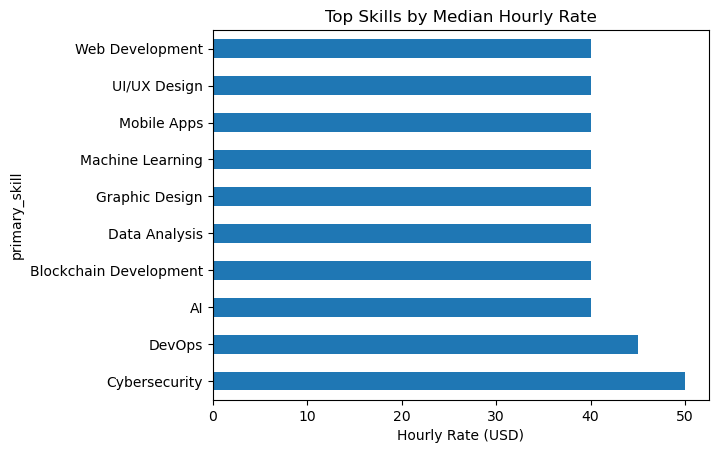

In [55]:
df.groupby("primary_skill")["hourly_rate_usd"].median().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top Skills by Median Hourly Rate")
plt.xlabel("Hourly Rate (USD)")
plt.show()


In [71]:
# What i see:
   # High-tech, specialized skills (Cybersecurity, DevOps, AI, Blockchain) earn the highest hourly rates.
   #Data-related skills (Data Analysis, Machine Learning) are also professionally valued.
   #Creative/visual fields (UI/UX, Graphic Design) have slightly lower rates, but still competitive.

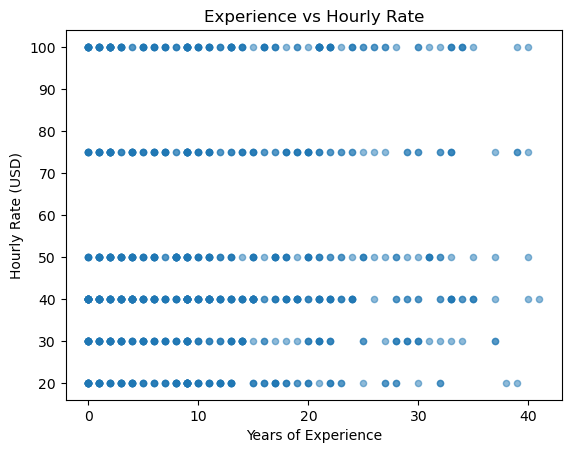

In [57]:
df.plot.scatter(x="years_experience", y="hourly_rate_usd", alpha=0.5)
plt.title("Experience vs Hourly Rate")
plt.xlabel("Years of Experience")
plt.ylabel("Hourly Rate (USD)")
plt.show()


In [73]:
# What i see :
   # Experience alone does not determine price in the freelancer market.
   # Skill specialization (like AI, DevOps, Cybersecurity) likely drives rates more than years of experience.

In [75]:
df.groupby("country")["hourly_rate_usd"].mean().sort_values(ascending=False).head(10)


country
India            57.555556
Argentina        57.553191
Indonesia        56.521739
United States    55.714286
China            54.693878
Australia        54.411765
Italy            53.452381
Turkey           53.333333
South Africa     52.954545
Germany          51.826923
Name: hourly_rate_usd, dtype: float64

In [77]:
df.groupby("country")["client_satisfaction_pct"].mean().sort_values(ascending=False).head(10)


country
Egypt             81.690476
United States     81.020408
India             80.822222
Spain             80.666667
Australia         80.450980
Argentina         80.446809
Russia            80.063830
Mexico            80.060000
South Korea       79.558824
United Kingdom    79.300000
Name: client_satisfaction_pct, dtype: float64

In [79]:
df[["rating", "client_satisfaction_pct"]].corr()


,rating,client_satisfaction_pct
rating,1.000000,-0.000108
client_satisfaction_pct,-0.000108,1.000000


In [81]:
df.groupby("gender")["hourly_rate_usd"].mean()


gender
Female    51.908163
Male      50.696078
Name: hourly_rate_usd, dtype: float64

In [83]:
df.groupby("primary_skill")[["rating", "client_satisfaction_pct"]].mean().sort_values(by="rating", ascending=False).head(10)


,rating,client_satisfaction_pct
primary_skill,,
DevOps,2.793750,78.901786
Machine Learning,2.576344,78.559140
Mobile Apps,2.555882,78.705882
UI/UX Design,2.529358,80.018349
Graphic Design,2.518280,79.419355
Cybersecurity,2.484884,78.593023
Web Development,2.451923,79.153846
Data Analysis,2.444792,78.604167
AI,2.437000,79.850000
